# Random Forest - Penguin Size Classification

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, ConfusionMatrixDisplay

In [4]:
from sklearn.model_selection import GridSearchCV

## Import Dataset

In [5]:
df = pd.read_csv('penguins_size.csv')

In [6]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

## Feature Engineering and Data Preprocessing

### Dropping NaN Values

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [12]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Exploring Categorical Columns

In [13]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [14]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

### Fixing incorrect value in Sex column

In [15]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [16]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                       .
Name: 336, dtype: object

In [17]:
df.at[336, 'sex'] = 'FEMALE'

In [18]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

In [19]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

## Exploratory Data Analysis

In [20]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<Axes: xlabel='species', ylabel='count'>

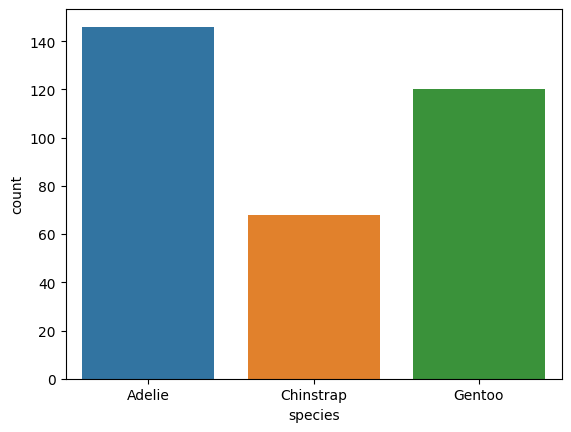

In [21]:
sns.countplot(data=df, x='species')

<Axes: xlabel='sex', ylabel='count'>

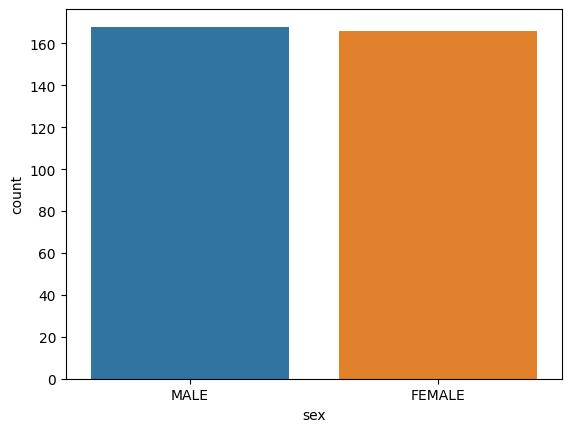

In [22]:
sns.countplot(data=df, x='sex')

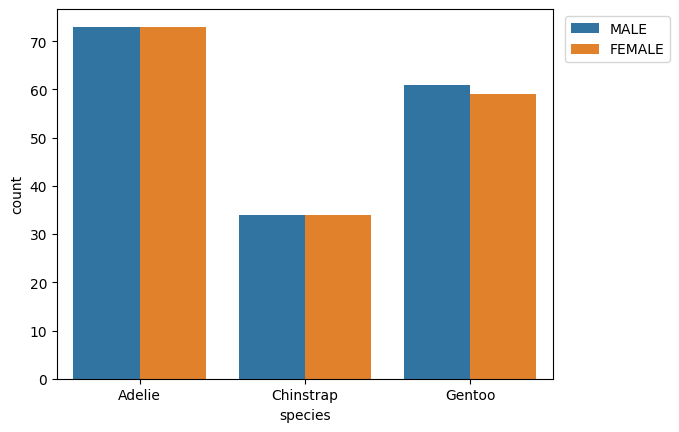

In [23]:
sns.countplot(data=df, x='species', hue='sex')
plt.legend(bbox_to_anchor=(0.85,0.9, 0.4, 0.1))

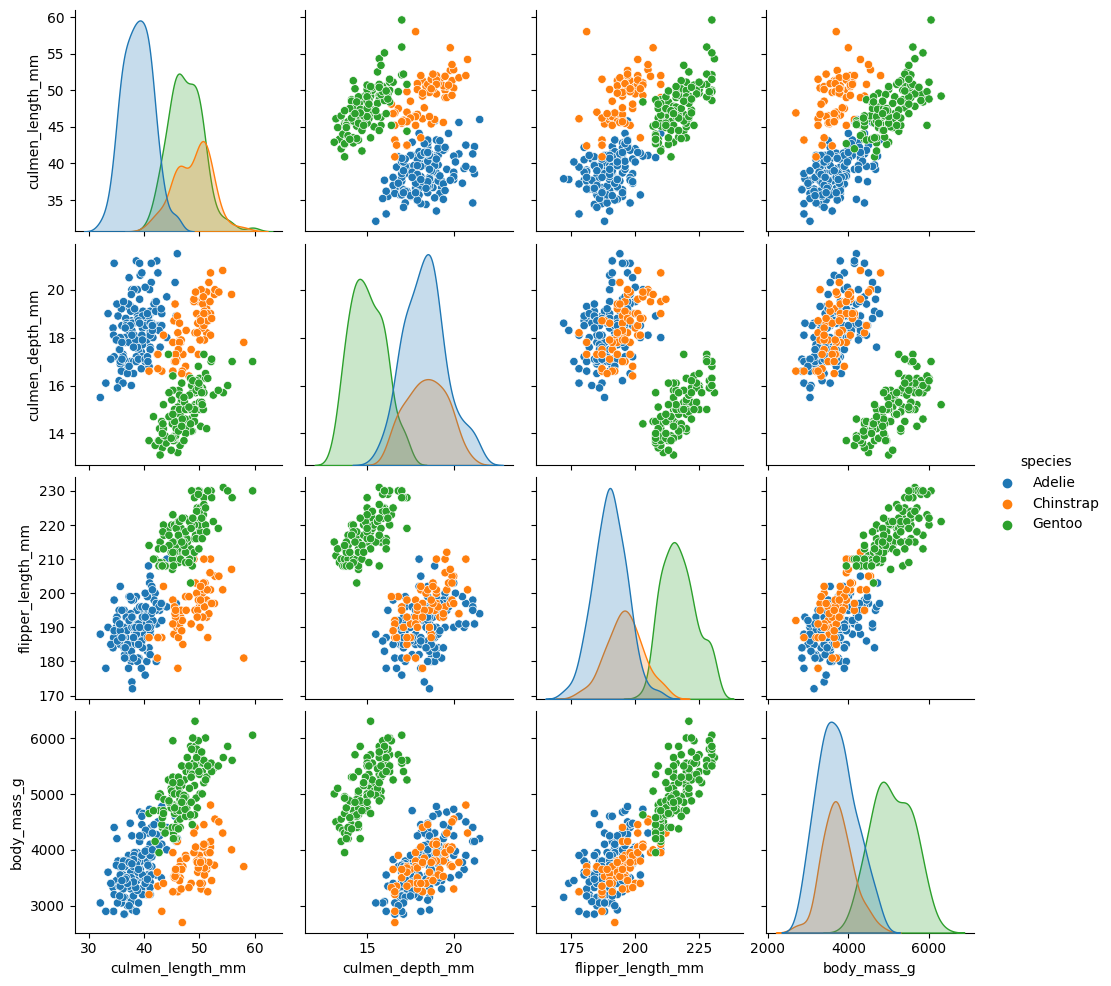

In [24]:
sns.pairplot(data=df, hue='species')

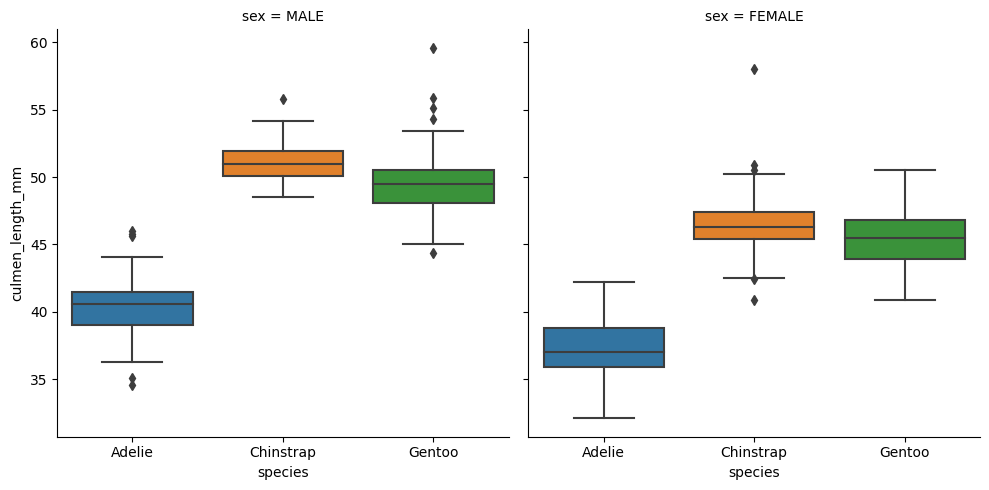

In [25]:
sns.catplot(data=df, x='species', y='culmen_length_mm', kind='box', col='sex')

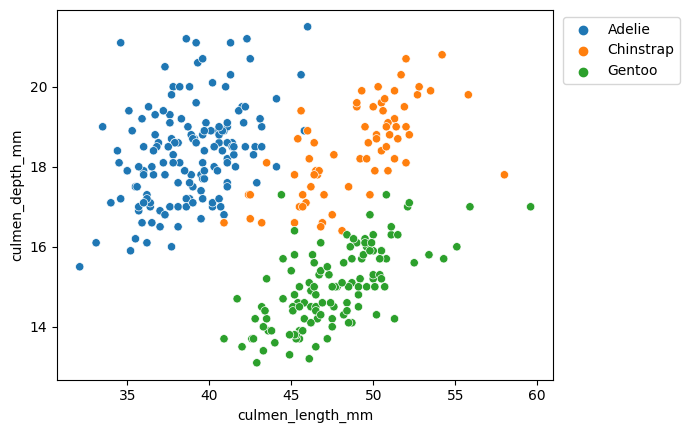

In [26]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.legend(bbox_to_anchor=(0.87,0.9, 0.4, 0.1))

## Creating Dummy Variables

In [30]:
pd.get_dummies(df.drop('species', axis=1), drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


## Separating X and Y Columns

In [31]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Creating Model

In [33]:
model = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=42)

In [34]:
model.fit(X_train, y_train)

c:\users\saad tariq\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, random_state=42)

## Prediction and Evaluation

In [35]:
predictions = model.predict(X_test)

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        49
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       101
   macro avg       0.99      0.98      0.99       101
weighted avg       0.99      0.99      0.99       101



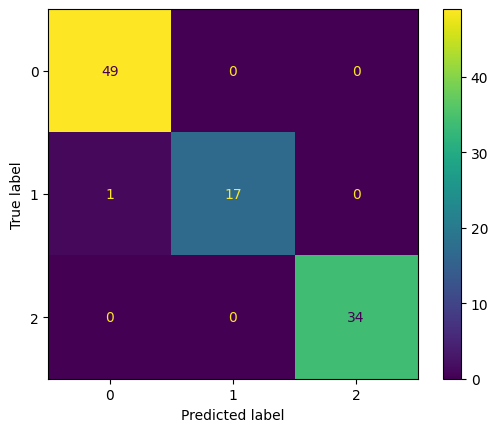

In [37]:
matrix = confusion_matrix(y_test, predictions)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()

In [38]:
print(f"Accuracy Score: {accuracy_score(y_test, predictions)}")
print(f"Precision Score: {precision_score(y_test, predictions, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, predictions, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, predictions, average='weighted')}")

Accuracy Score: 0.9900990099009901
Precision Score: 0.9902970297029703
Recall Score: 0.9900990099009901
F1 Score: 0.9900075721857899
